<a class="anchor" id="0.1"></a>
# **Table of Contents** 


1.	[Introduction](#1)
2.	[Case study](#2)
3.	[Loading libraries and data](#3)
4.	[Explore Data with the plot method](#4)
5.  [Split the data into training and testing](#5)
6.	[Implementation with StatsForecast](#6)
7.	[Evaluate the model](#7)
8. [Conclusion](#8)
9. [References](#9)

# **Introduction** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)

Time series modeling is a technique widely used in economic and financial analysis to predict and understand the evolution of variables over time. In the specific case of family remittances, time series modeling is used to analyze and forecast the flows of money sent by migrants to their countries of origin.

Family remittances are money transfers made by migrant workers to their families in their countries of origin. These transfers represent an important source of income for many families and also have a significant impact on recipient economies. Therefore, understanding and predicting patterns of family remittances is of vital importance for both recipient households and economic policy makers.

Time series modeling applied to family remittances involves analyzing historical transfer data to identify seasonal patterns, trends and other factors that may influence remittance behavior. This may include economic, political, social and demographic factors in both origin and destination countries.

Once these patterns have been identified, statistical techniques and econometric models are used to build a model that can predict the future behavior of family remittances. These models can be simple or more complex, depending on the availability of data and the precision required in the estimates.

Time series modeling applied to family remittances can help economic policy makers make informed decisions, such as designing policies to encourage the sending of remittances or implementing measures to mitigate the negative effects of volatility in remittance flows. Additionally, it can give recipient households an idea of future income and help them better plan their spending and savings.

In summary, time series modeling applied to family remittances is a powerful tool to analyze and predict the flows of money sent by migrants to their countries of origin. By understanding the patterns and factors that influence these transfers, economic decision-making can be improved and the quality of life of recipient families can be improved.

# **Case study** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)

This mini case study, we will examine the use of time series models to forecast family remittances in Nicaragua. Family remittances represent a significant source of income in many recipient countries, and the ability to accurately predict remittance flows can have a substantial impact on economic planning and the quality of life of recipient families.

Family remittances play a crucial role in the economy of many countries, and accurate forecasts can help policymakers and recipient families make informed decisions. The case will focus on the collection and analysis of historical remittance data, the selection and training of time series forecasting models, and the evaluation of forecast accuracy.

It is important to note that forecast accuracy may be affected by unpredictable external factors, such as changes in immigration policies or global economic events. Therefore, it is advisable to perform regular updates to the model and adjust it as necessary.

In summary, family remittance forecasting using time series models is a process that involves collecting and exploring historical data, preparing the data, selecting and training a model, evaluating its performance, and making future forecasts. This approach can provide valuable information for decision-making and economic planning related to family remittances.

The data that we will use can be extracted from the official site of the Central Bank of Nicaragua [BCN](https://www.bcn.gob.ni/sites/default/files/estadisticas/siec/datos/1a.2.1.04.htm) or in my [github](https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/Remesa_Nicaragua_2000-2023.csv)

In [1]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

import scipy.stats as stats

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series

# Handling time
# ==============================================================================
from calendar import month_abbr

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

/Users/user/Documents/miniconda3/envs/statsforecast/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose 
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#008080', #212946 #29021A
    'axes.facecolor': '#008080',
    'savefig.facecolor':'#008080',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

# Definir el tamaño del gráfico
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (16,5)

## **Load data**

Information about our data:
* fecha(date): Period in which the information to analyze has been collected ranges from 2000 to August 2023.
* Remesa(Remittance): monthly indicator of remittances in millions of dollars, with an opportunity of 25 days of lag.


In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/Remesa_Nicaragua_2000-2023.csv", sep=";",parse_dates=["fecha"] )
df

,fecha,remesa
0,2000-01-01,19.8
1,2000-02-01,20.8
2,2000-03-01,23.4
3,2000-04-01,23.6
4,2000-05-01,24.8
...,...,...
279,2023-04-01,374.3
280,2023-05-01,426.2
281,2023-06-01,394.2
282,2023-07-01,408.9


The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In [4]:
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df.head()

,ds,y,unique_id
0,2000-01-01,19.8,1
1,2000-02-01,20.8,1
2,2000-03-01,23.4,1
3,2000-04-01,23.6,1
4,2000-05-01,24.8,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         284 non-null    datetime64[ns]
 1   y          284 non-null    float64       
 2   unique_id  284 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.8+ KB


# **Explore Data with the plot method** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

When you want to generate a forecasting model, it is important to represent the time series values. This allows patterns such as trends and seasonality to be identified.

We will use the `plot` method of `Statsforecast` to visualize our data. This method prints 8 random series from the dataset and is useful for basic EDA.

This is what our data looks like, after having performed a couple of maneuvers on our data.

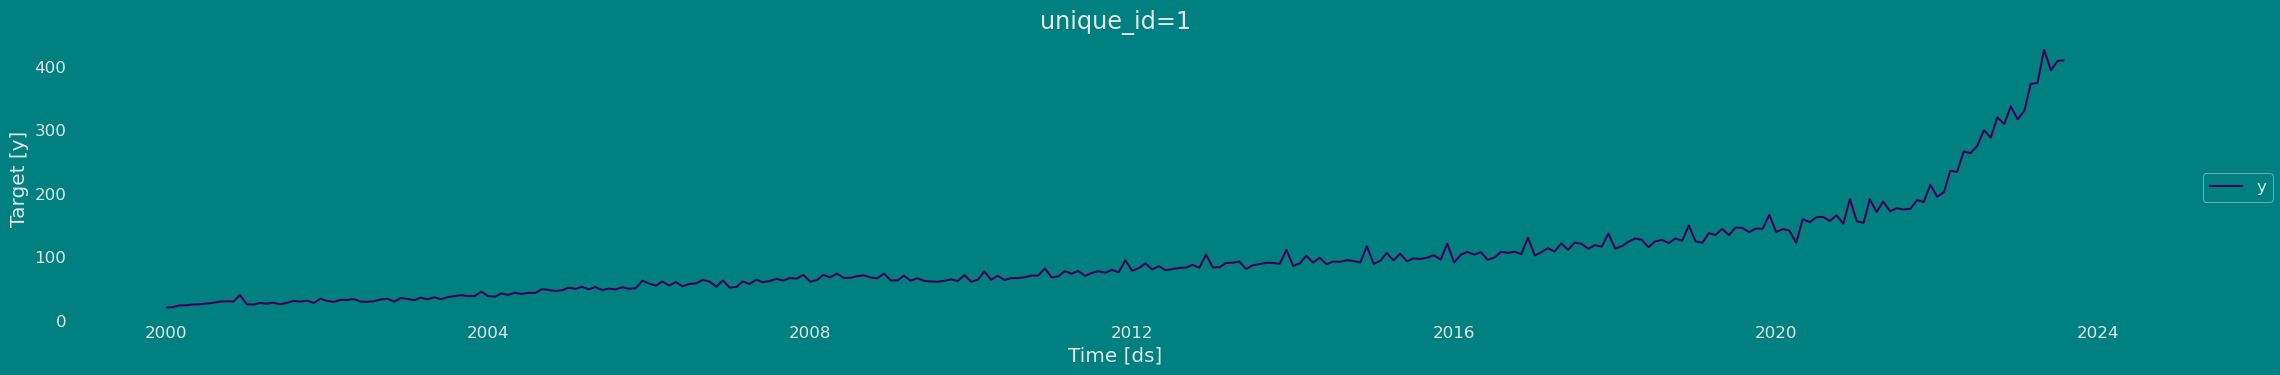

In [6]:
plot_series(df)

## **Seasonality**

In [7]:
df1=df.copy()

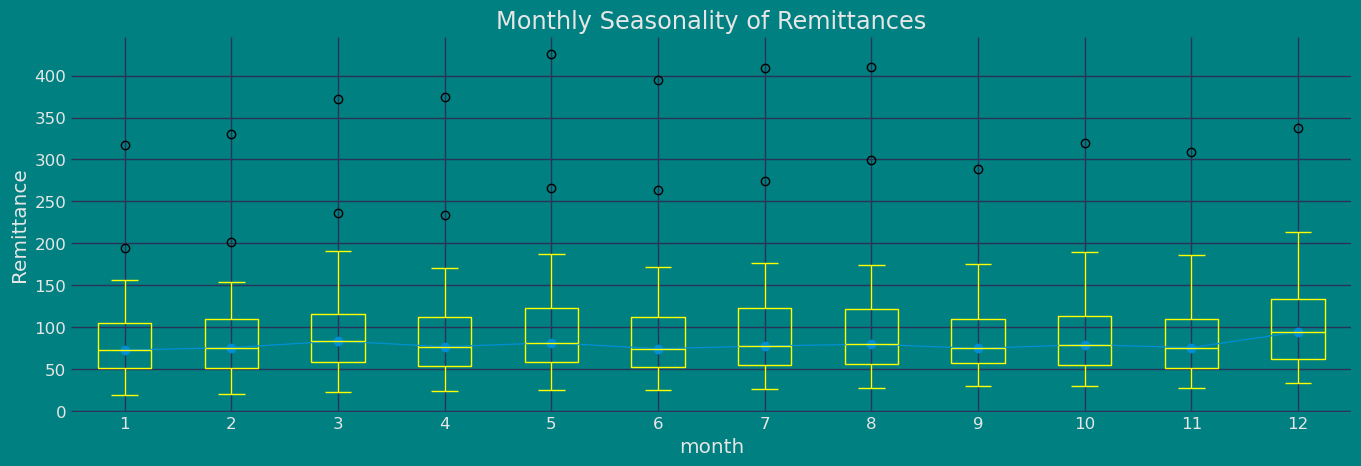

In [68]:
# Boxplot graph for monthly seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(16, 5))
df1['month'] = df1['ds'].apply(lambda x: x.month)
df1.boxplot(column="y", by='month', ax=ax, color="yellow")
df1.groupby('month')["y"].median().plot(style='o-', linewidth=0.9, ax=ax)
ax.set_ylabel('Remittance')
ax.set_title('Monthly Seasonality of Remittances')
fig.suptitle('');
#plt.savefig("Gráfico de Barra-mes")

We can clearly see that our data has a monthly seasonality.

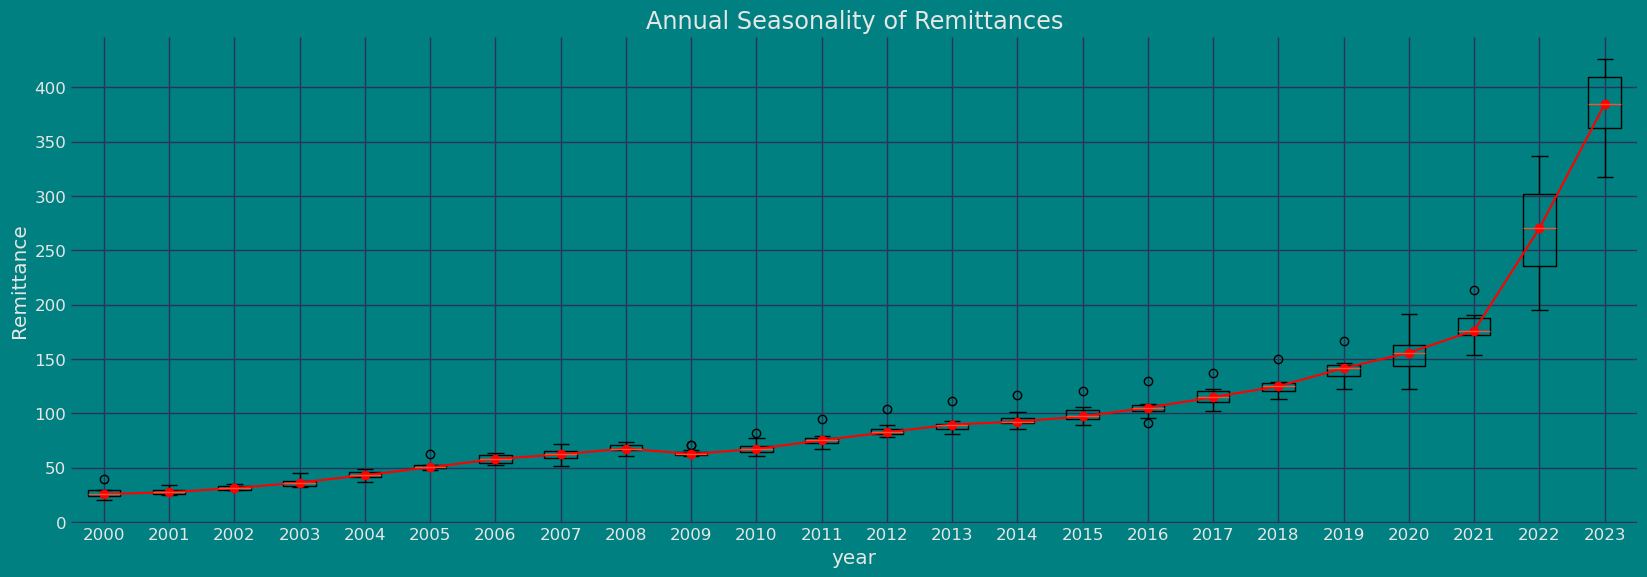

In [69]:
# Boxplot graph for annual seasonality
# ==============================================================================
# Extract year component from date
df1['year'] = df['ds'].dt.year

# Create a dictionary to store the data for each year
data_anual = {}
for year in df1['year'].unique():
    data_anual[year] = df1.loc[df1['year'] == year, 'y'].values

# Create a data list for the Boxplot chart
boxplot_data = [data_anual[year] for year in sorted(data_anual.keys())]

# Create the Boxplot chart
plt.figure(figsize=(18, 6))
plt.boxplot(boxplot_data, labels=sorted(data_anual.keys()))
plt.xlabel('year')
plt.ylabel('Remittance')
plt.title('Annual Seasonality of Remittances')

# Add the median line graph
medians = [np.median(data_anual[year]) for year in sorted(data_anual.keys())]
plt.plot(range(1, len(medians) + 1), medians, marker='o', color='red', linestyle='-')

plt.show()

## **Decomposition of the time series**

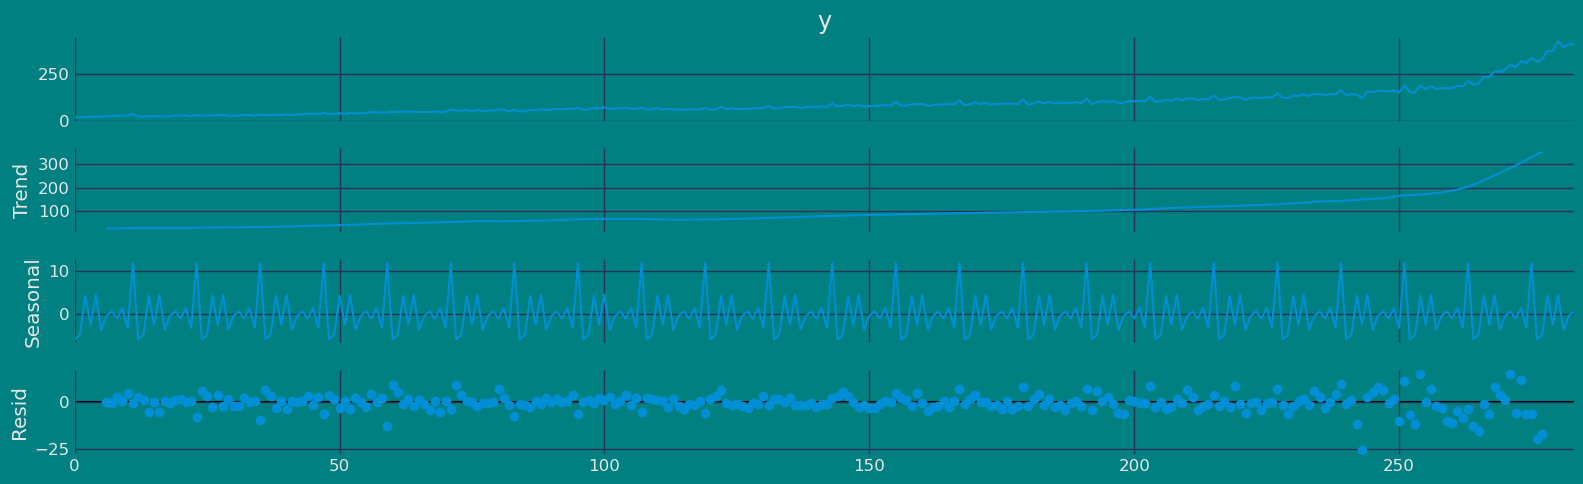

In [10]:
a = seasonal_decompose(df["y"], model = "add", period=12)
a.plot();

# **Split the data into training and testing** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

Let's divide our data into sets
1. Data to train our model
2. Data to test our model

For the test data we will use the last 6 months to test and evaluate the performance of our model.

In [11]:
train = df[df.ds<='2023-02-01'] 
test = df[df.ds>'2023-02-01'] 

print("Data size")

train.shape, test.shape

Data size


((278, 3), (6, 3))

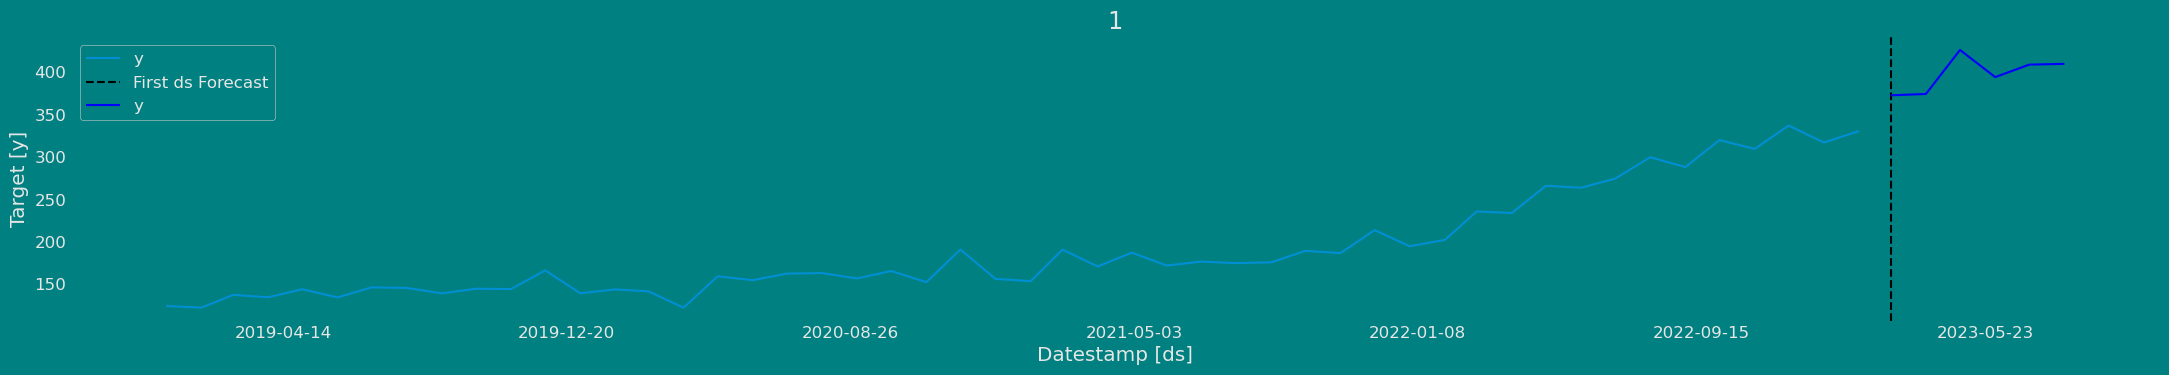

In [12]:
StatsForecast.plot(train,test, engine="matplotlib", max_insample_length=50,)

# **Implementation with StatsForecast** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

We are going to train the `Theta` model, using the `AutoThetha` function. This model will help us forecast the amount of remittance in the next 6 months.

In [13]:
from statsforecast import StatsForecast
from statsforecast.models import AutoTheta

## **Building Model**
Import and instantiate the models. Setting the argument is sometimes tricky. This article on [Seasonal periods](https://robjhyndman.com/hyndsight/seasonal-periods/)) by the master, Rob Hyndmann, can be useful `season_length`.

In [56]:
season_length = 12 # monthly data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models = [AutoTheta(season_length=season_length,decomposition_type="additive", model="STM")]

We fit the models by instantiating a new StatsForecast object with the following parameters:

models: a list of models. Select the models you want from models and import them.

* `freq:` a string indicating the frequency of the data. (See panda’s available frequencies.)

* `n_jobs:` n_jobs: int, number of jobs used in the parallel processing, use -1 for all cores.

* `fallback_model:` a model to be used if a model fails.

Any settings are passed into the constructor. Then you call its fit method and pass in the historical data frame.

In [57]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(models=models, freq='MS', n_jobs=-1)

## **Fit the Model**

In [58]:
# fit the models
sf.fit(train)

StatsForecast(models=[AutoTheta])

Let’s see the results of our Theta model. We can observe it with the following instruction:

In [59]:
result=sf.fitted_[0,0].model_
result

{'mse': 124.23372992257131,
 'amse': array([41.27905141, 57.97282847, 92.07129916]),
 'fit': results(x=array([235.62186754,   0.73300681]), fn=124.02672093659433, nit=43, simplex=array([[236.11407808,   0.73411298],
        [235.62186754,   0.73300681],
        [232.42831452,   0.73381173]])),
 'residuals': array([ 6.39048271e+00, -1.53646393e+00, -1.32919846e+00,  2.50602684e+00,
        -5.16497803e-01,  3.09251900e+00, -1.29634018e+00,  2.82535553e-02,
         1.85661545e+00, -1.02264023e-01, -2.86102295e-01,  7.52566223e+00,
        -4.18322411e+00, -5.75957184e+00, -2.45674057e+00,  9.04978943e-01,
        -7.43965530e-01,  2.31785965e-01, -9.60137939e-01,  1.91801682e+00,
        -4.38831329e-01,  1.84866333e-01, -3.40944023e+00,  3.19175301e+00,
         5.55965118e+00, -4.05828857e+00, -1.50250854e+00,  2.15975189e+00,
        -3.08952332e-01, -1.45206757e+00, -3.80971375e+00, -9.42800522e-01,
         2.49734955e+00,  5.68806458e-01, -4.10693130e+00,  2.00552673e+00,
        

Let us now visualize the residuals of our models.

As we can see, the result obtained above has an output in a dictionary, to extract each element from the dictionary we are going to use the `.get()` function to extract the element and then we are going to save it in a `pd.DataFrame()`.

In [60]:
residual=pd.DataFrame(result.get("residuals"), columns=["residual Model"])
residual

,residual Model
0,6.390483
1,-1.536464
2,-1.329198
3,2.506027
4,-0.516498
...,...
273,29.524573
274,-2.375946
275,24.267694
276,-5.113220


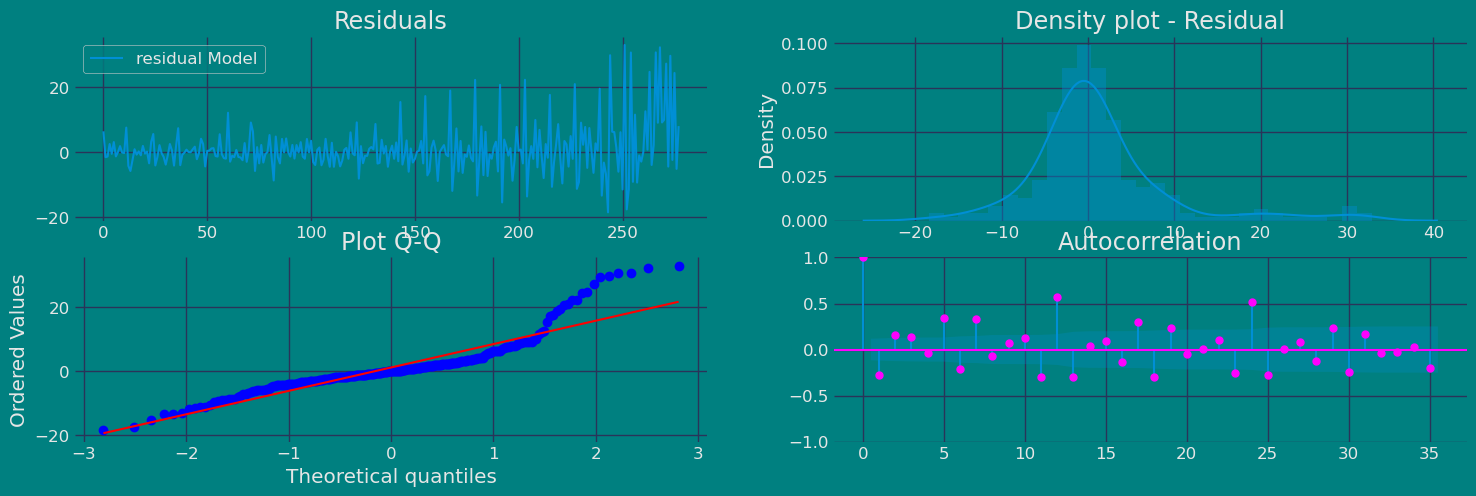

In [61]:
fig, axs = plt.subplots(nrows=2, ncols=2)

residual.plot(ax=axs[0,0])
axs[0,0].set_title("Residuals");

sns.distplot(residual, ax=axs[0,1]);
axs[0,1].set_title("Density plot - Residual");

stats.probplot(residual["residual Model"], dist="norm", plot=axs[1,0])
axs[1,0].set_title('Plot Q-Q')

plot_acf(residual,  lags=35, ax=axs[1,1],color="fuchsia")
axs[1,1].set_title("Autocorrelation");

plt.show();

## **Forecast Method**

If you want to gain speed in productive settings where you have multiple series or models we recommend using the `StatsForecast.forecast` method instead of `.fit` and `.predict`.

The main difference is that the `.forecast` doest not store the fitted values and is highly scalable in distributed environments.

The forecast method takes two arguments: forecasts next `h` (horizon) and `level`.

* `h (int):` represents the forecast h steps into the future. In this case, 6 days ahead.

* `level (list of floats):` this optional parameter is used for probabilistic forecasting. Set the level (or confidence percentile) of your prediction interval. For example, `level=[90]` means that the model expects the real value to be inside that interval 90% of the times.

The forecast object here is a new data frame that includes a column with the name of the model and the y hat values, as well as columns for the uncertainty intervals. Depending on your computer, this step should take around 1min. (If you want to speed things up to a couple of seconds, remove the AutoModels like `ARIMA` and `Theta`)

In [62]:
# Forecasting
forecast_df = sf.forecast(horizon, fitted=True,level=[90])

forecast_df

,ds,AutoTheta,AutoTheta-lo-90,AutoTheta-hi-90
unique_id,,,,
1,2023-03-01,336.058838,324.228851,350.980255
1,2023-04-01,329.499329,313.274384,345.447632
1,2023-05-01,336.940369,314.837219,355.122772
1,2023-06-01,329.008484,307.828766,348.021149
1,2023-07-01,332.602875,310.064240,355.125397
1,2023-08-01,333.984894,307.819061,359.379150


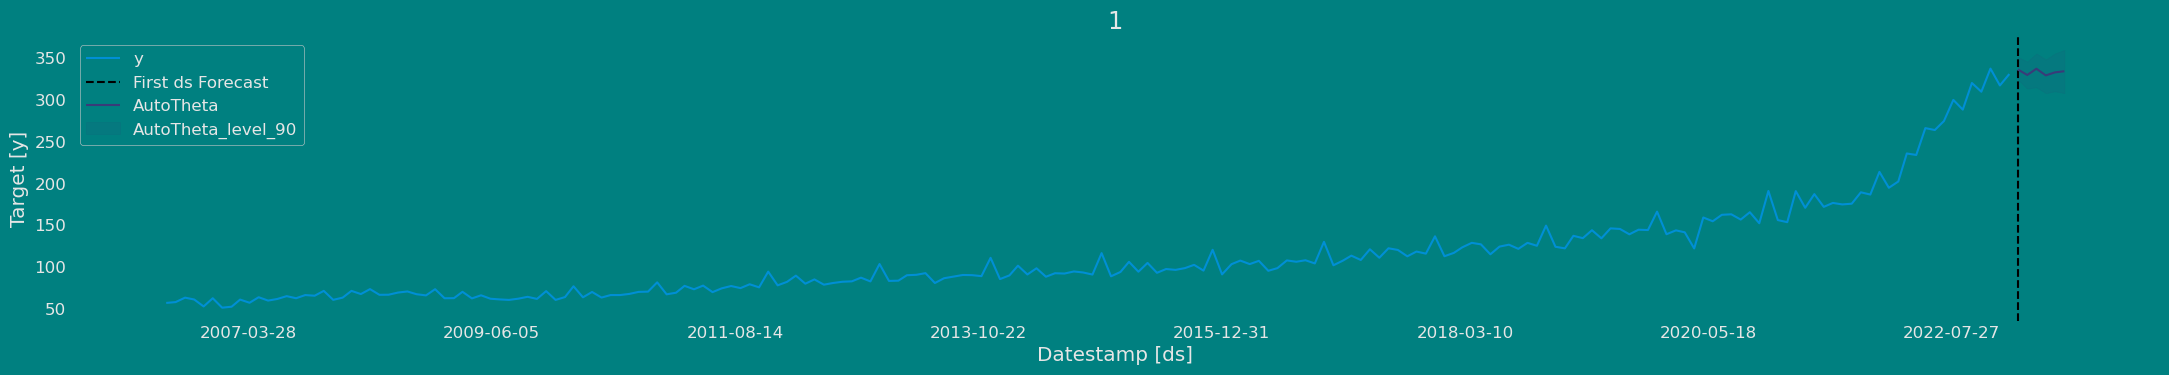

In [64]:
sf.plot(train, forecast_df.reset_index(), level=[90], max_insample_length=200, )
#plot_series(df, forecast_df.reset_index(),level=[90],  max_insample_length=200, palette="magma")

# **Evaluate the model** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

In [24]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [66]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = y_true.merge(y_pred, how='left', on=['unique_id', 'ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values, 
                                                 y_true[model].values, 
                                                 y_hist['y'].values, seasonality=24)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [67]:
evaluate_performace(train,test,forecast_df, models=["AutoTheta"])

,mae,mape,mase,rmse,smape
AutoTheta,64.667535,16.073484,3.199243,67.250864,17.576184


# **Conclusion** <a class="anchor" id="8"></a>


[Table of Contents](#0.1)

The purpose of this example is to be able to know the steps we can follow to carry out forecasting in a certain area of the economy, using the `Theta` model of `StatsForecast`. We must also consider other aspects such as the more specific analysis of the economic problem. of each country, but these aspects would be outside the scope of this tutorial.

On the other hand, family remittances represent a significant source of income in many recipient countries, and the ability to accurately predict remittance flows can have a substantial impact on economic planning and the quality of life of recipient families. In this case we have used the `Theta` model to train our model and then be able to evaluate the time series forecasting model.

In [70]:
print(evaluate_performace(train,test,forecast_df, models=["AutoTheta"]))

                 mae       mape      mase       rmse      smape
AutoTheta  64.667535  16.073484  3.199243  67.250864  17.576184


It is important to keep in mind that this result can improve if the following aspects are considered, such as:

* Include other models, such as the [Arima](https://nixtla.github.io/statsforecast/docs/models/autoarima.html) model, since this model can include the seasonal part, and then make comparisons between them.
* Add exogenous variables to our model.
* Create Machine Learning or Deep Learning models.

The results obtained by the `Theta` Model visually represent that the model has been trained quite well, however the aspects mentioned above must be taken into consideration. On the other hand, if we see the performance of our model with the metrics, we can see that the errors are quite low.

# **References** <a class="anchor" id="9"></a>


[Table of Contents](#0.1)

1. [Jose A. Fiorucci, Tiago R. Pellegrini, Francisco Louzada, Fotios Petropoulos, Anne B. Koehler (2016). “Models for optimising the theta method and their relationship to state space models”. International Journal of Forecasting](https://www.sciencedirect.com/science/article/pii/S0169207016300243).
2. [Nixtla Parameters](https://nixtla.github.io/statsforecast/src/core/models.html#autotheta).
3. [Pandas available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
4. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”.](https://otexts.com/fpp3/tscv.html).
5. [Seasonal periods- Rob J Hyndman](https://robjhyndman.com/hyndsight/seasonal-periods/).
6. [Theta model](https://nixtla.github.io/statsforecast/docs/models/autotheta.html)